In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [46]:
X = np.load('data/data_prepared.npy')
y = np.array(pd.read_csv('data/data_prepared_labels.csv'))

To make it easier for now, we create 6 clusters ([0, 499], [500, 999]...).\
Thanks to this, we will be able to somehow visualize it.

In [95]:
clusters = (y - 1000) // 300
labels = []
for x in range(5):
    labels.append(f'{x * 300 + 1000}-{x * 300 + 1299}')
labels

['1000-1299', '1300-1599', '1600-1899', '1900-2199', '2200-2499']

t-SNE

In [68]:
samples = np.random.choice(len(X), 50000, replace=False)
X_50k = X[samples]
y_50k = y[samples]
clusters_50k = clusters[samples]

In [69]:
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(np.array(X_50k))

In [15]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['b', 'g', 'c', 'r', 'k', 'y'])

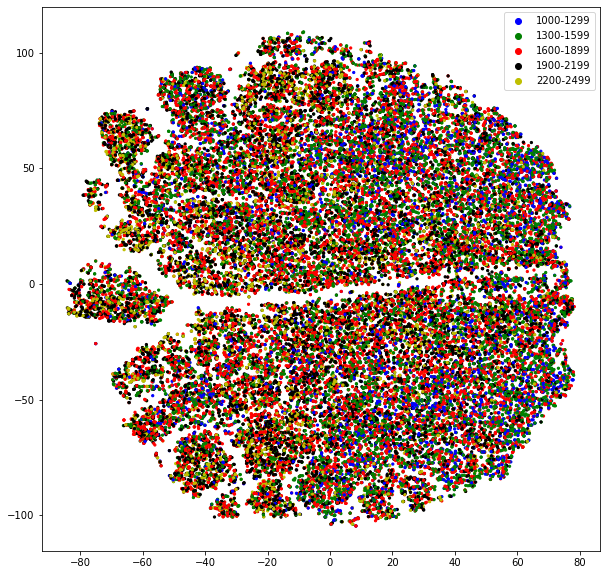

In [96]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=clusters_50k, cmap=colors, s = 5)
plt.legend(handles=scatter.legend_elements()[0], labels=labels)

As we can see, it is not easy to distinguish between classes, however we will try different methods to extract what we can.\
At least we got nice looking picture ;)

PCA

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

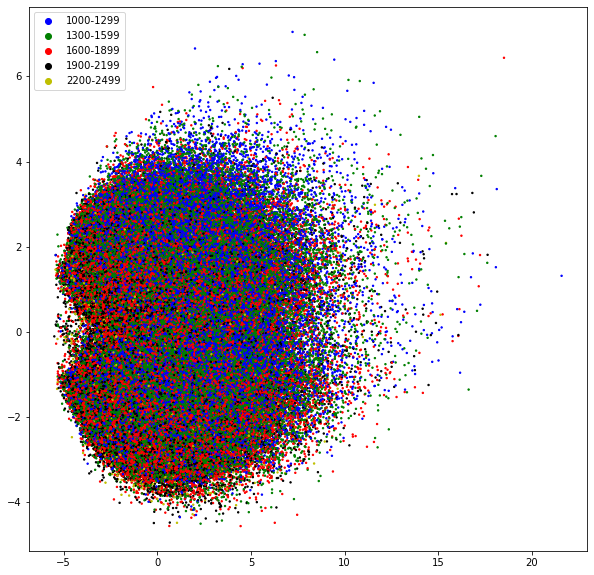

In [99]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap=colors, s = 2)
plt.legend(handles=scatter.legend_elements()[0], labels=labels)

LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

X_lda = lda.fit_transform(X, y)

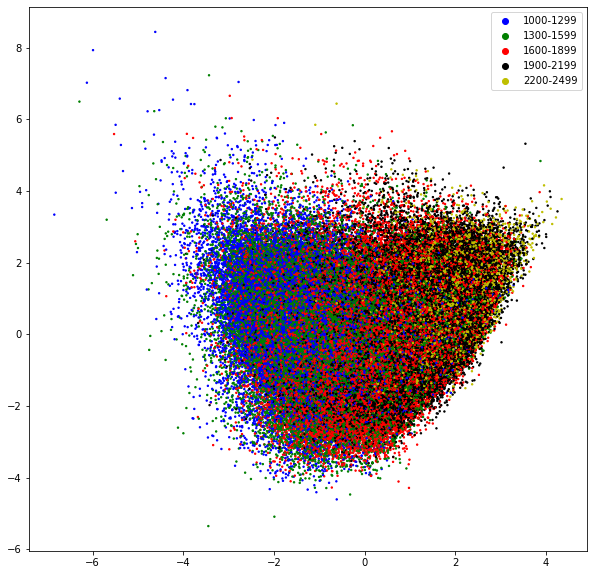

In [102]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=clusters, cmap=colors, s = 2)
plt.legend(handles=scatter.legend_elements()[0], labels=labels)

Having more examples, we can see that there are some patterns in data, but still there is a lot of noise